# Esquema _upwind_ para la ecuación de advección en una dimensión

Se presenta la solución de la ecuación de onda usando el método de diferencias finitas
con un esquema _upwind_.


## Problema


Se quiere resolver la ecuación

$$\frac{\partial u(x, t)}{\partial t}  + v \frac{\partial u(x, t)}{\partial x} = 0\, ,$$

para $x\in [0, L]$, con

\begin{align}
&u(x, 0) = I(x)\\
&u(0, t) = U_0\, .
\end{align}

## Esquema de solución

Como vimos anteriormente, si usamos un método de diferencias finitas centradas en el espacio
y diferencias finitas hacia adelante en el tiempo obtenemos un esquema inestable.

Una solución para esta inestabilidad es usar un equema _upwind_ (aguas arriba), que
consiste en expandir la diferencia en la dirección contraria a la propagación. Desde
un punto de vista intuitivo, esto está justificado en tener un esquema en el que
la información se propague en la misma dirección en la que va el fenómeno físico.

Por tanto, tenemos

\begin{align}
&\frac{u_{i}^{n + 1} - u_{i}^{n}}{\Delta t}
  + v\left(\frac{u_i^n - u_{i - 1}^n}{\Delta x}\right)
  = 0 \quad \text{si } v > 0\, ,\\
&\frac{u_{i}^{n + 1} - u_{i}^{n}}{\Delta t}
  + v\left(\frac{u_{i + 1}^n - u_i^n}{\Delta x}\right)
  = 0 \quad \text{si } v < 0\, .
\end{align}

Si escribimos

$$v^{+} = \max\{v, 0\}\, ,\quad v^{-}=\min\{v, 0\}, ,$$

y

$$
u_x^{-} = \frac{u_i^n - u_{i - 1}^n}{\Delta x}\, ,\quad
u_x^{+} = \frac{u_{i + 1}^n - u_i^n}{\Delta x}\, ,
$$

tenemos la forma general para esquema _upwind_ de primer orden

$$u_i^{n + 1} = u_i^n - \Delta t\left[v^+ u_x^- + v^- u_x^+\right]\, .$$

Este esquema es estable si se satisface la condición CFL
(Courant-Friedrichs-Lewy):

$$C = \left|\frac{v\, \Delta t}{\Delta x}\right| \leq 1\, .$$

In [7]:
%matplotlib notebook

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [19]:
largo = 1.0 # m
vel = 1.0 # m/s
npts = 100
niter = 500
x = np.linspace(0, largo, npts)
C = 1.0
dx = x[1] - x[0]
dt = C*dx/vel

In [20]:
sol = np.zeros((niter, npts))
sol[0, :] = np.exp(-1000*(x - largo/4)**2)
sol[0, 0] = 0 # Condición de frontera

In [21]:
for cont in range(1, niter):
    ux_m = (sol[cont - 1, 1:-1] - sol[cont - 1, 0:-2])/dx
    ux_p = (sol[cont - 1, 2:] - sol[cont - 1, 1:-1])/dx
    vm = min([vel, 0])
    vp = max([vel, 0])
    sol[cont, 1:-1] = sol[cont - 1, 1:-1] - dt*(vp*ux_m + vm*ux_p)

In [22]:
# Actualizar animacion
def update(data, line):
    line.set_ydata(data)
    return line,

<IPython.core.display.Javascript object>


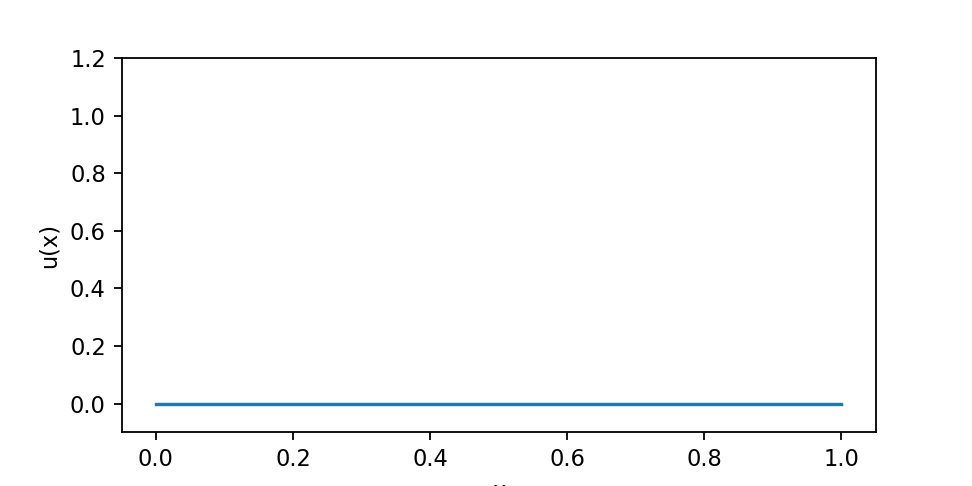

In [23]:
# Animacion
fig0, ax0 = plt.subplots(figsize=(6, 3))
line0, = ax0.plot(x, sol[0, :])
ani = animation.FuncAnimation(fig0, update, sol, interval=niter,
                              repeat=True, fargs=(line0,))
plt.xlabel('x')
plt.ylabel('u(x)')
plt.ylim(-0.1, 1.2)
plt.show()


**Pruebe a cambiar el número de Courant y repetir la simulación**.
